In [48]:
import pickle
import pandas as pd

In [49]:
train_annotations = pickle.load(open("data/train/annotations.pkl", "rb"))
test_annotations = pickle.load(open("data/test/annotations.pkl", "rb"))

In [50]:
print(train_annotations.keys())
print(train_annotations['01088_A05_P010740_S00_N33_R1.mzML'].keys())
print(train_annotations['01088_A05_P010740_S00_N33_R1.mzML'][47994].keys())
print()
# for key in train_annotations['01088_A05_P010740_S00_N33_R1.mzML'][47994]:
    # print(key, train_annotations['01088_A05_P010740_S00_N33_R1.mzML'][47994][key])

# Annotation array:
# ? - 
# b3 (ion) - 
#
print(len(train_annotations['01088_A05_P010740_S00_N33_R1.mzML'][47994]['annotations_arr'][0]))
print(len(train_annotations['01088_A05_P010740_S00_N33_R1.mzML'][47994]['annotations_arr']))

dict_keys(['01088_A05_P010740_S00_N33_R1.mzML'])
dict_keys([47994, 43786, 38701, 50086, 35343, 34936, 35134, 40237, 36327, 35724, 33864, 33919, 41002, 35936, 36132, 37240, 43515, 47365, 35869, 33876, 50137, 40399, 36744, 39592, 49949, 38496, 32405, 39029, 43511, 38764, 40230, 40606, 35520, 35596, 41220, 35665, 36625, 50102, 36998, 39708, 43588, 39230, 40439, 41352, 50064, 40614, 41032, 35409, 43669, 44242, 39781, 41411, 50135, 48391, 40618, 39353, 39760, 49774, 47254, 40838, 38742, 48520, 45005, 39429, 35885, 48563, 40431, 40337, 45413, 33224, 39121, 30045, 45603, 44256, 50052, 40423, 36781, 35050, 50124, 45440, 28343, 49229, 45427, 45211, 44669, 28200, 48170, 37206, 44436, 44628, 40638, 50050, 15415, 40809, 22920, 46974, 50100, 41857, 44462, 37667, 36922, 40822, 35133, 40761, 45983, 36264, 48961, 40420, 43698, 40565, 39832, 31328, 49847, 37929, 38925, 27846, 34320, 35406, 45392, 38253, 31898, 35192, 40958, 49780, 41154, 35534, 45685, 44257, 29286, 39464, 34080, 43014, 48449, 38930, 33

In [51]:
# Get discretized spectrum
from utils import create_discretized_spectrum

# mz_array, intensity_arr, annotations=None
mz_arr = train_annotations['01088_A05_P010740_S00_N33_R1.mzML'][47994]['mz_arr']
intensity_arr = train_annotations['01088_A05_P010740_S00_N33_R1.mzML'][47994]['intensity_arr']
annotations_arr = train_annotations['01088_A05_P010740_S00_N33_R1.mzML'][47994]['annotations_arr']

disc_spec = create_discretized_spectrum(mz_arr, intensity_arr, annotations_arr)
print(disc_spec)
print(len(disc_spec))
print()

for i in range(len(disc_spec)):
    if disc_spec[i] != 0:
        print(i, disc_spec[i])

[0. 0. 0. ... 0. 0. 0.]
2000

326 0.8789307679710262
333 1.0
370 0.2806427163547362
372 0.6880877744199454


In [52]:
# Do the same but for every mzml file and every scan
all_disc_specs = []
all_disc_spects_true = []
all_disc_spects_false = []
for mzml_file in test_annotations:
    for scan_num in test_annotations[mzml_file]:
        mz_arr = test_annotations[mzml_file][scan_num]['mz_arr']
        intensity_arr = test_annotations[mzml_file][scan_num]['intensity_arr']
        annotations_arr = test_annotations[mzml_file][scan_num]['annotations_arr']

        disc_spec_true = create_discretized_spectrum(mz_arr, intensity_arr, annotations_arr[0])
        disc_spec_true = [(i,x) for (i,x) in enumerate(disc_spec_true) if x != 0]

        disc_spec_full = [disc_spec_true]
        for idx in range(1, len(annotations_arr)):
            disc_spec_false = create_discretized_spectrum(mz_arr, intensity_arr, annotations_arr[idx])
            disc_spec_false = [(i,x) for (i,x) in enumerate(disc_spec_false) if x != 0]
            disc_spec_full.append(disc_spec_false)
        all_disc_specs.append(disc_spec_full)

print(len(all_disc_specs))

# all_disc_specs is a list of lists of tuples
# each list of tuples is a scan, first is true, rest are false
# each tuple is (index, value)

for scan in all_disc_specs[0:3]:
    for i, spec in enumerate(scan):
        print ("True " if i == 0 else "False", ":", len(spec), ":", spec)
    print()

11250
True  : 1154 : [(265, 0.0377426232291199), (266, 0.12868782808516382), (267, 0.028922264844815013), (268, -0.0714568975479453), (269, 0.04799854116193665), (270, 0.686301894086209), (271, 0.3209880930588352), (272, -0.11154254867651224), (273, -0.039400273359561394), (274, 0.03885049134156855), (279, -0.16021732749866285), (280, -0.028795446154916023), (281, 0.08645686686785985), (283, -0.1459097156671947), (284, 0.059740824864777525), (285, 0.0939787698922004), (287, 0.15937314449399848), (288, 0.32759925263311834), (289, -0.11687654231346252), (290, 0.030942453875048192), (291, -0.02430717719692422), (293, 0.09687317773075771), (294, 0.023744987641038908), (295, -0.05673231651007892), (296, 0.0582686690876663), (297, 0.09487386649867616), (298, -0.13730735718675888), (299, 0.08179333280836298), (301, -0.054229106606138264), (302, -0.023251091955374795), (303, 0.02271526426291606), (305, -0.03447092959636257), (306, 0.06296174039943427), (307, -0.11546834684450208), (308, -0.069

In [53]:
# Scramble all_disc_specs, each idx is a scan
import random
random.shuffle(all_disc_specs)

for scan in all_disc_specs[0:3]:
    for i, spec in enumerate(scan):
        print ("True " if i == 0 else "False", ":", len(spec), ":", spec)
    print()

True  : 157 : [(190, -0.40230994613005605), (196, 0.2628963841572062), (198, -0.7286581567582697), (200, 1.0), (204, -0.6180590206362551), (212, -0.003516207408148013), (214, -0.705297112665825), (220, -0.19803704230228175), (222, 0.8601414375547497), (223, 0.31430424934154316), (224, -0.23806634131378654), (225, -0.2287285040000527), (226, -0.500867606925668), (228, 0.6787357275485355), (229, -0.420749481701057), (232, -0.43467439116557643), (234, -0.28627416433189035), (236, 0.21178919790491962), (239, -0.40204965386399394), (241, 0.5303689457103635), (242, -0.27113874164630747), (243, -0.3196770479507095), (248, 0.35698299786567406), (249, -0.30864117751379655), (250, -0.7941772018289331), (259, -0.43090801193070744), (260, 0.30945904485738707), (262, 0.5320874914018717), (264, -0.2654968072730775), (276, -0.6386468334130176), (277, 0.2379429127072712), (281, -0.1957409523442096), (283, -0.26764948585111636), (284, -0.23616030259706094), (287, -0.3011972072206142), (295, -0.25621257

Random sample of 1000.0 scans (4000 peptides)
Done


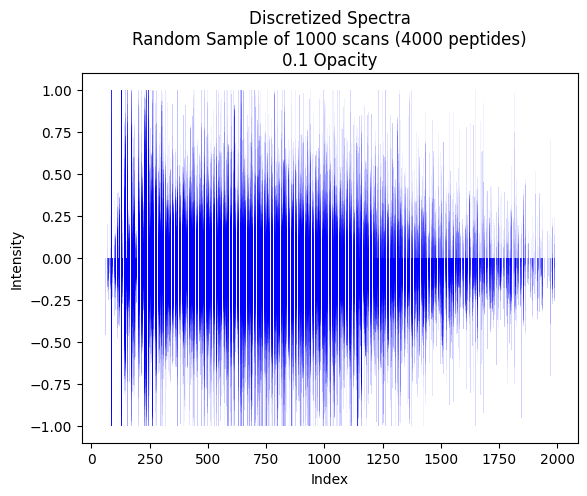

In [54]:
import matplotlib.pyplot as plt
import numpy as np

num_rows = 4000
print(f"Random sample of {num_rows/4} scans ({num_rows} peptides)")
rows_plotted = 0
for scan in all_disc_specs:
    for i, spec in enumerate(scan):
        x = [pair[0] for pair in spec]
        y = [pair[1] for pair in spec]
        plt.bar(x, y, alpha=0.05, color='blue')
        rows_plotted += 1
    if rows_plotted >= num_rows:
        print("Done")
        plt.xlabel("Index")
        plt.ylabel("Intensity")
        plt.title("Discretized Spectra\nRandom Sample of 1000 scans (4000 peptides)\n0.1 Opacity")
        plt.show()
        break

Random sample of 1000.0 scans (4000 peptides)
Done


c:\Users\mcgin\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


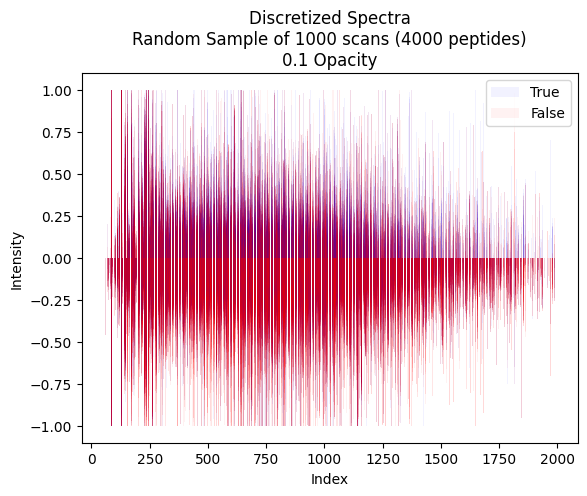

In [55]:
import matplotlib.pyplot as plt
import numpy as np

num_rows = 4000
print(f"Random sample of {num_rows/4} scans ({num_rows} peptides)")
rows_plotted = 0
for scan in all_disc_specs:
    for i, spec in enumerate(scan):
        x = [pair[0] for pair in spec]
        y = [pair[1] for pair in spec]
        color = ''
        if i == 0:
            color = 'blue'
        else:
            color = 'red'
        plt.bar(x, y, alpha=0.05, color=color)
        rows_plotted += 1
    if rows_plotted >= num_rows:
        print("Done")
        plt.xlabel("Index")
        plt.ylabel("Intensity")
        plt.title("Discretized Spectra\nRandom Sample of 1000 scans (4000 peptides)\n0.1 Opacity")
        plt.legend(['True', 'False'])
        plt.show()
        break

Random sample of 1000 peptides, true peptides only
Done


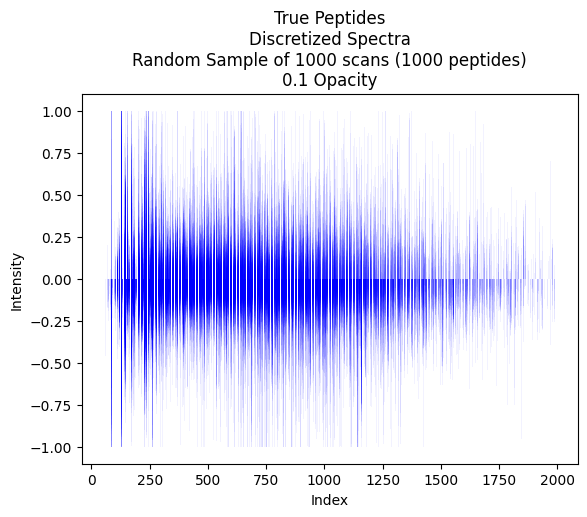

In [56]:
# True peptides
num_rows = 1000
print(f"Random sample of {num_rows} peptides, true peptides only")
rows_plotted = 0
for scan in all_disc_specs:
    for i, spec in enumerate(scan):
        if i == 0: # First index is true
            x = [pair[0] for pair in spec]
            y = [pair[1] for pair in spec]
            plt.bar(x, y, alpha=0.05, color='blue')
            rows_plotted += 1
    if rows_plotted >= num_rows:
        print("Done")
        plt.xlabel("Index")
        plt.ylabel("Intensity")
        plt.title("True Peptides\nDiscretized Spectra\nRandom Sample of 1000 scans (1000 peptides)\n0.1 Opacity")
        plt.show()
        break

Random sample of 3000 peptides, false peptides only
Done


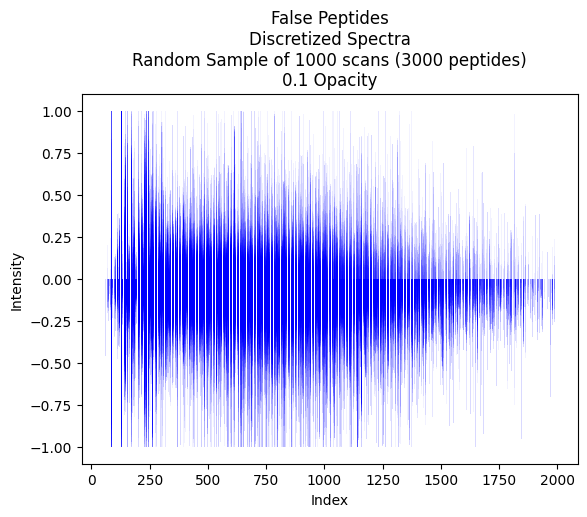

In [57]:
# False peptides
num_rows = 3000
print(f"Random sample of {num_rows} peptides, false peptides only")
rows_plotted = 0
for scan in all_disc_specs:
    for i, spec in enumerate(scan):
        if i != 0: # All indices except first are false
            x = [pair[0] for pair in spec]
            y = [pair[1] for pair in spec]
            plt.bar(x, y, alpha=0.05, color='blue')
            rows_plotted += 1
    if rows_plotted >= num_rows:
        print("Done")
        plt.xlabel("Index")
        plt.ylabel("Intensity")
        plt.title("False Peptides\nDiscretized Spectra\nRandom Sample of 1000 scans (3000 peptides)\n0.1 Opacity")
        plt.show()
        break

In [58]:
# true_disc_specs = [[x[0]] for x in all_disc_specs]
# false_disc_specs = [x[1:] for x in all_disc_specs]

# print(len(true_disc_specs))
# print(len(false_disc_specs))

# print(true_disc_specs[0:10])
# print(false_disc_specs[0:10])

In [59]:

# for i, disc_spec in enumerate(true_disc_specs):
#     x = [x[0] for x in disc_spec]
#     y = [x[1] for x in disc_spec]
#     plt.bar(x, y, alpha=0.1, color='blue')

#     if i % 3000 == 0 and i != 0:
#         print(i)
#         plt.show()
#         break

In [60]:
# for i, disc_spec in enumerate(false_disc_specs):
#     x = [x[0] for x in disc_spec]
#     y = [x[1] for x in disc_spec]
#     plt.bar(x, y, alpha=0.1, color='blue')

#     if i % 1000 == 0 and i != 0:
#         print(i)
#         plt.show()
#         break

In [61]:
print(train_annotations['01088_A05_P010740_S00_N33_R1.mzML'][47994]["usi"])
print(train_annotations['01088_A05_P010740_S00_N33_R1.mzML'][47994]["peptides"])

mzspec:PXD010154:01088_A05_P010740_S00_N33_R1.mzML:scan:47994
['R.IGYPDDIVSNDNKLNNEYLELNYKEDEYFENIIQNLK.F', 'F.NESTIIDEKPTSIDNNSMN+0.984C+57.021PGPKLEKPGEEYSIEVSLNK.G', 'F.EDSQNKLGAEMVINTSGKYGYKSTFC+57.021SQDIMGPNILQNLK.P', 'F.NESTIIDEKPTSIDNNSMNC+57.021PGPKLEKPGEEYSIEVSLN+0.984K.G']


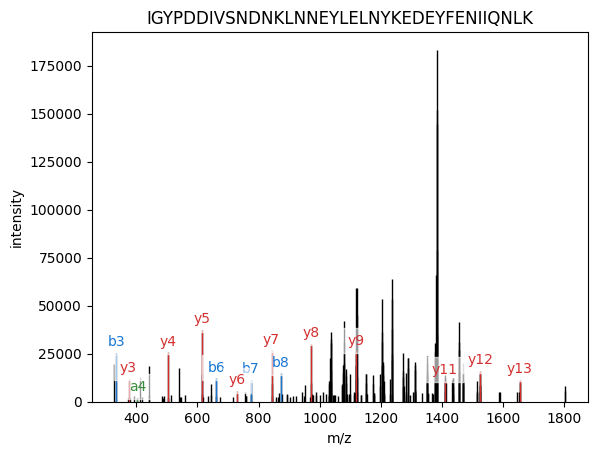

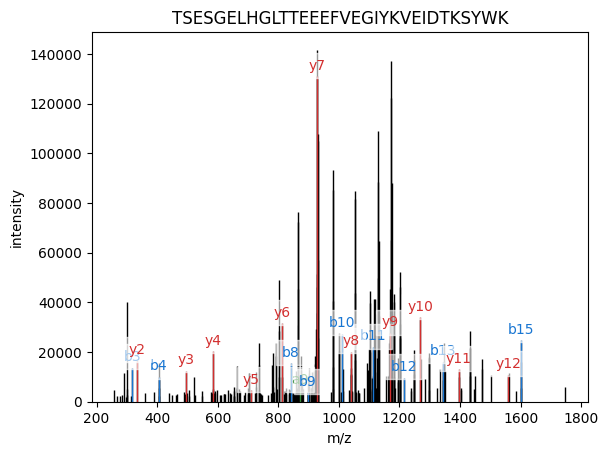

PyteomicsError: Pyteomics error, message: 'Unknown label: +57.021D'

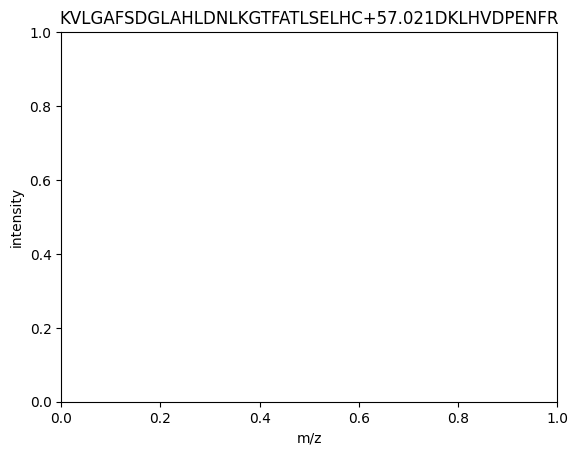

In [62]:
from pyteomics import pylab_aux as pa, usi
import matplotlib.pyplot as plt

count = 0
for mzml_file in train_annotations:
    for scan_num in train_annotations[mzml_file]:
        if count >=5:
            break
        count += 1

        spectrum = usi.proxi(train_annotations[mzml_file][scan_num]["usi"], 'massive')
        peptide = train_annotations[mzml_file][scan_num]["peptides"][0][2:-2]
        pa.annotate_spectrum(spectrum, peptide, precursor_charge=2, ion_types='aby', title=peptide)
        plt.show()

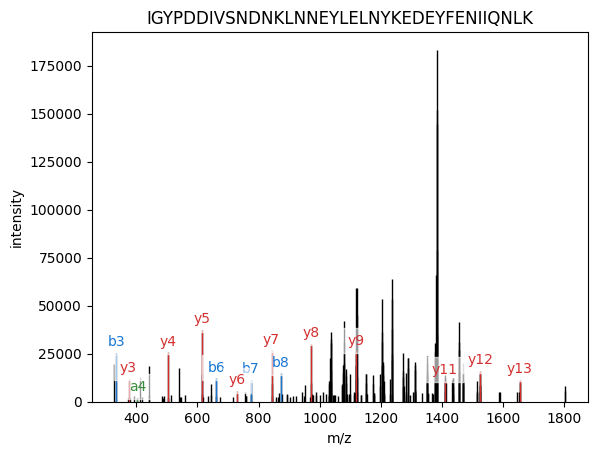

In [ ]:
from pyteomics import pylab_aux as pa, usi
import matplotlib.pyplot as plt

spectrum = usi.proxi(
    'mzspec:PXD010154:01088_A05_P010740_S00_N33_R1.mzML:scan:47994',
    'massive')
peptide = 'IGYPDDIVSNDNKLNNEYLELNYKEDEYFENIIQNLK'

pa.annotate_spectrum(spectrum, peptide, precursor_charge=2, ion_types='aby', title=peptide)
plt.show()